In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
import glob
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [2]:
fsize = 15
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = fsize-5
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

plt.rcParams['axes.unicode_minus'] = False

plt.style.use('default')


In [3]:
def pos_rate(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    
    #
    return TPR,FPR

1156430
2312860
1156430


/tmp/ipykernel_12953/3166947706.py:237: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('figs/feature_peformance.png',dpi=300)
/home/ec2-user/miniconda3/envs/psgv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


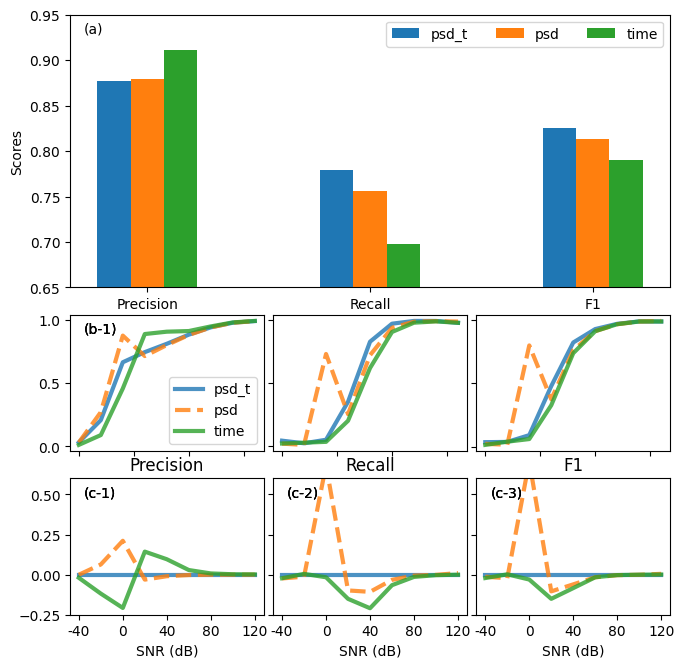

In [11]:
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms


fig = plt.figure(tight_layout=True, figsize=(8,8))
gs = gridspec.GridSpec(3, 3, height_ratios=(2, 1,1),
                      left=0.1, right=0.85, bottom=0.15, top=0.9,
                      wspace=0.05, hspace=0.15)
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)

ax = fig.add_subplot(gs[0, :])
#ax.plot(np.arange(0, 1e6, 1000))
#ax.set_ylabel('YLabel0')
#ax.set_xlabel('XLabel0')


N = 3
x_labels=['Precision','Recall','F1']
ind = np.arange(len(x_labels))  # the x locations for the groups
width = 0.15       # the width of the bars

#fig = plt.figure()
#ax = fig.add_subplot(111)

'''
yvals = [4, 9, 2]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')
'''
features=['psd_t','psd','time']
#fig,ax=plt.subplots(1,3, figsize=(8,4))
#for feature, color in zip(features,colors):
rects=[]
for i,feature in enumerate(features):
    #XDF
    # merging the files
    joined_files = os.path.join("../..","data","results", "aug", "xdf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    xdf=pd.read_parquet(joined_list)

    ###YDF
    # merging the files
    joined_files = os.path.join("../..","data","results", "aug", "ydf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    ydf=pd.read_parquet(joined_list)
    
    y_true=ydf["0"].values
    y_pred=ydf["1"].values
    pr,re,f1,_=precision_recall_fscore_support(y_true,y_pred, average='binary')
    acc=accuracy_score(y_true,y_pred)
    rects1=ax.bar(ind+width*i, [pr,re,f1], width)
    rects.append(rects1)



ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( x_labels )
ax.legend( (rects[0][0], rects[1][0], rects[2][0]), features , ncol=4, loc='upper right')
ax.text(0, 1.0, '(a)', transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects[0])
#autolabel(rects2)
#autolabel(rects3)

ax.set_ylim([.65,.95])


ax0 = fig.add_subplot(gs[2, 0])
ax1 = fig.add_subplot(gs[2, 1])
ax2 = fig.add_subplot(gs[2, 2])

ax0a = fig.add_subplot(gs[1, 0])
ax1a = fig.add_subplot(gs[1, 1])
ax2a = fig.add_subplot(gs[1, 2])


features=['psd_t','psd','time']
linestyles=['-','--','-','--']
#fig,ax=plt.subplots(1,3, figsize=(8,4), sharey=True)
#for feature, color in zip(features,colors):
for feature,ls in zip(features, linestyles):
    #XDF
    # merging the files
    joined_files = os.path.join("../..","data","results", "aug", "xdf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    xdf=pd.read_parquet(joined_list)

    ###YDF
    # merging the files
    joined_files = os.path.join("../..","data","results", "aug", "ydf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    ydf=pd.read_parquet(joined_list)
    print(len(ydf))

    count_array=[]
    precision_array=[]
    recall_array=[]
    f1_array=[]
    acc_array=[]
    fpr_array=[]
    xlabels_arr=[]
    #print(fpr)

    bins=np.arange(-40,122,20)
    #names=["ambient","-50:-20","-20:10","10:40","40:70","70+"]
    names=np.arange(len(bins))
    for i in np.arange(len(bins)):
        single_label=bins[i]
        if i==0:
            lower=-100
            single_label='%s'%bins[i]  #r'\
            #single_label='r\<%s'%bins[i]
        else:
            lower=bins[i]
        if i == int(len(bins)-1):
            upper = 200
            single_label='%s'%bins[i]
        else:
            upper=bins[i+1]
        #print(lower,upper)
        bool_arr=(xdf[xdf.columns[-1]]>=lower) & (xdf[xdf.columns[-1]]<upper)
        
        y_true=ydf[bool_arr]["0"].values
        y_pred=ydf[bool_arr]["1"].values
        
        pr,re,f1,_=precision_recall_fscore_support(y_true,y_pred, average='binary')
        acc=accuracy_score(y_true,y_pred)
        tpr,fpr=pos_rate(y_true,y_pred)
        
        
        count_array.append(bool_arr.sum()) 
        precision_array.append(pr)
        recall_array.append(re)
        f1_array.append(f1)
        acc_array.append(acc)
        fpr_array.append(fpr)
        
        xlabels_arr.append(single_label)
        
    if feature=='psd_t':
        f1_ref=np.array(f1_array)
        recall_ref=np.array(recall_array)
        precision_ref=np.array(precision_array)
    '''
    ax[0].plot(names,precision_array)
    ax[0].set_xticklabels(names, rotation=45, ha='right')
    ax[1].plot(names,recall_array)
    ax[1].set_xticklabels(names, rotation=45, ha='right')
    ax[2].plot(names,acc_array)
    ax[2].set_xticklabels(names, rotation=45, ha='right')
    '''
    ax0.plot( xlabels_arr,np.array(precision_array)-precision_ref, label=feature, lw=3, alpha=.8, linestyle=ls)
    #ax[0].set_xticklabels(xlabels_arr, rotation=45, ha='right')
    ax0.set_xticks(ticks=np.arange(len(xlabels_arr))[::2],labels=xlabels_arr[::2])
    ax0.set_xlabel('SNR (dB)')
    ax0.set_title('Precision')
    ax0.set_ylim([-.25,.6])
    ax0.text(0, 1.0, '(c-1)', transform=ax0.transAxes + trans,
            fontsize='medium', verticalalignment='top')
    
    
    
    ax1.plot(names,np.array(recall_array)-recall_ref, lw=3, alpha=.8, linestyle=ls)
    ax1.set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2])
    ax1.set_xlabel('SNR (dB)')
    ax1.set_title('Recall')
    ax1.set_yticklabels([])
    ax1.set_ylim([-.25,.6])
    ax1.text(0, 1.0, '(c-2)', transform=ax1.transAxes + trans,
            fontsize='medium', verticalalignment='top')
    
    if feature =='all':
        ax3=ax2.twinx()
        ax3.bar(names,count_array, color='grey', alpha=.25)
        ax3.yaxis.label.set_color('grey')
        ax3.tick_params(axis='y', colors='grey')
        ax3.set_ylabel('Counts')
    ax2.plot(names,np.array(f1_array)-f1_ref, lw=3, alpha=.8, linestyle=ls)
    ax2.set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2])
    ax2.set_xlabel('SNR (dB)')
    ax2.set_title('F1')
    ax2.set_yticklabels([])
    ax2.set_ylim([-.25,.6])
    ax2.text(0, 1.0, '(c-3)', transform=ax2.transAxes + trans,
            fontsize='medium', verticalalignment='top')
    
    
    ax0a.plot(np.array(precision_array), label=feature, lw=3, alpha=.8, linestyle=ls)
    ax0a.set_xticklabels([])
    ax0a.text(0, 1.0, '(b-1)', transform=ax0a.transAxes + trans,
            fontsize='medium', verticalalignment='top')
    
    #ax0a.set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    #ax0.set_xlabel('SNR (dB)')
    
    
    
    ax1a.plot(np.array(recall_array), lw=3, alpha=.8, linestyle=ls)
    ax1a.set_xticklabels([])
    ax1a.set_yticklabels([])
    
    #ax1.set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    #ax1.set_xlabel('SNR (dB)')
    
    if feature =='all':
        ax3=ax2a.twinx()
        ax3.bar(names,count_array, color='grey', alpha=.25)
        ax3.yaxis.label.set_color('grey')
        ax3.tick_params(axis='y', colors='grey')
    ax2a.plot(np.array(f1_array), lw=3, alpha=.8, linestyle=ls)
    ax2a.set_xticklabels([])
    ax2a.set_yticklabels([])
    
    #ax2.set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    #ax2.set_xlabel('SNR (dB)')
#ax0.legend(loc='lower right')
ax0a.legend(loc='lower right')


#plt.subplots_adjust(wspace=0, hspace=0)
#fig.tight_layout()
plt.savefig('figs/feature_peformance.png',dpi=300)

In [ ]:
np.arange(len(xlabels_arr))[::2]

In [ ]:
xlabels_arr[::2]

In [ ]:
fig,ax=plt.subplots()
features=['psd_t','psd','time']
for feature in features:
    # merging the files
    joined_files = os.path.join("../..","data","results", "aug", "ydf_%s*.pq" %feature)

    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    print(joined_list)
    ydf=pd.read_parquet(joined_list)
    from sklearn.metrics import roc_curve, auc
    fpr,tpr,_=roc_curve(ydf["0"], ydf["2"])
    roc_auc=auc(fpr,tpr)
    print(roc_auc)
    ax.plot(fpr,tpr)

In [ ]:
precision_recall_fscore_support(ydf["0"].values, ydf["1"].values, average='binary')

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tn, fp, fn, tp = confusion_matrix(ydf["0"].values, ydf["1"].values).ravel()
(tn, fp, fn, tp)

In [ ]:
fp/(fp+tn)

In [ ]:

fpr,tpr,_=roc_curve(ydf["0"], ydf["2"])
roc_auc=auc(fpr,tpr)

In [ ]:
plt.plot(fpr,tpr)

# precision recall as function of SNR

In [ ]:
import pandas as pd
import glob
import os
  
# merging the files
joined_files = os.path.join("results", "aug", "xdf*.pq")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)

In [ ]:
xdf=pd.read_parquet(joined_list)

In [ ]:
plt.hist(xdf["546"])

In [ ]:
bins=np.arange(-50,100,30)

In [ ]:
bins

In [ ]:
#colors=
features=['psd_t','psd','time']
linestyles=['-','--','-','--']
fig,ax=plt.subplots(1,3, figsize=(8,4), sharey=True)
#for feature, color in zip(features,colors):
for feature,ls in zip(features, linestyles):
    #XDF
    # merging the files
    joined_files = os.path.join("results", "aug", "xdf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    xdf=pd.read_parquet(joined_list)

    ###YDF
    # merging the files
    joined_files = os.path.join("results", "aug", "ydf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    ydf=pd.read_parquet(joined_list)
    print(len(ydf))

    count_array=[]
    precision_array=[]
    recall_array=[]
    f1_array=[]
    acc_array=[]
    fpr_array=[]
    xlabels_arr=[]
    #print(fpr)

    bins=np.arange(-40,122,20)
    #names=["ambient","-50:-20","-20:10","10:40","40:70","70+"]
    names=np.arange(len(bins))
    for i in np.arange(len(bins)):
        single_label=bins[i]
        if i==0:
            lower=-100
            single_label='<%s'%bins[i]  #r'\
            #single_label='r\<%s'%bins[i]
        else:
            lower=bins[i]
        if i == int(len(bins)-1):
            upper = 200
            single_label='>%s'%bins[i]
        else:
            upper=bins[i+1]
        #print(lower,upper)
        bool_arr=(xdf[xdf.columns[-1]]>=lower) & (xdf[xdf.columns[-1]]<upper)
        
        y_true=ydf[bool_arr]["0"].values
        y_pred=ydf[bool_arr]["1"].values
        
        pr,re,f1,_=precision_recall_fscore_support(y_true,y_pred, average='binary')
        acc=accuracy_score(y_true,y_pred)
        tpr,fpr=pos_rate(y_true,y_pred)
        
        count_array.append(bool_arr.sum()) 
        precision_array.append(pr)
        recall_array.append(re)
        f1_array.append(f1)
        acc_array.append(acc)
        fpr_array.append(fpr)
        
        xlabels_arr.append(single_label)
    '''
    ax[0].plot(names,precision_array)
    ax[0].set_xticklabels(names, rotation=45, ha='right')
    ax[1].plot(names,recall_array)
    ax[1].set_xticklabels(names, rotation=45, ha='right')
    ax[2].plot(names,acc_array)
    ax[2].set_xticklabels(names, rotation=45, ha='right')
    '''
    ax[0].plot( xlabels_arr,precision_array, label=feature, lw=3, alpha=.8, linestyle=ls)
    #ax[0].set_xticklabels(xlabels_arr, rotation=45, ha='right')
    ax[0].set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    ax[0].set_xlabel('SNR (dB)')
    
    
    
    ax[1].plot(names,recall_array, lw=3, alpha=.8, linestyle=ls)
    ax[1].set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    ax[1].set_xlabel('SNR (dB)')
    
    if feature =='all':
        ax2=ax[2].twinx()
        ax2.bar(names,count_array, color='grey', alpha=.25)
        ax2.yaxis.label.set_color('grey')
        ax2.tick_params(axis='y', colors='grey')
    ax[2].plot(names,f1_array, lw=3, alpha=.8, linestyle=ls)
    ax[2].set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    ax[2].set_xlabel('SNR (dB)')
ax[0].legend()
#ax[0].locator_params(axis='x', nbins=3)

fig.tight_layout()


In [ ]:
#colors=
features=['psd_t','psd','time']
linestyles=['-','--','-','--']
fig,ax=plt.subplots(1,3, figsize=(8,4), sharey=True)
#for feature, color in zip(features,colors):
for feature,ls in zip(features, linestyles):
    #XDF
    # merging the files
    joined_files = os.path.join("results", "aug", "xdf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    xdf=pd.read_parquet(joined_list)

    ###YDF
    # merging the files
    joined_files = os.path.join("results", "aug", "ydf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    ydf=pd.read_parquet(joined_list)
    print(len(ydf))

    count_array=[]
    precision_array=[]
    recall_array=[]
    f1_array=[]
    acc_array=[]
    fpr_array=[]
    xlabels_arr=[]
    print(fpr)

    bins=np.arange(-40,122,20)
    #names=["ambient","-50:-20","-20:10","10:40","40:70","70+"]
    names=np.arange(len(bins))
    for i in np.arange(len(bins)):
        single_label=bins[i]
        if i==0:
            lower=-100
            single_label='<%s'%bins[i]  #r'\
            #single_label='r\<%s'%bins[i]
        else:
            lower=bins[i]
        if i == int(len(bins)-1):
            upper = 200
            single_label='>%s'%bins[i]
        else:
            upper=bins[i+1]
        #print(lower,upper)
        bool_arr=(xdf[xdf.columns[-1]]>=lower) & (xdf[xdf.columns[-1]]<upper)
        
        y_true=ydf[bool_arr]["0"].values
        y_pred=ydf[bool_arr]["1"].values
        
        pr,re,f1,_=precision_recall_fscore_support(y_true,y_pred, average='binary')
        acc=accuracy_score(y_true,y_pred)
        tpr,fpr=pos_rate(y_true,y_pred)
        
        
        count_array.append(bool_arr.sum()) 
        precision_array.append(pr)
        recall_array.append(re)
        f1_array.append(f1)
        acc_array.append(acc)
        fpr_array.append(fpr)
        
        xlabels_arr.append(single_label)
        
    if feature=='all':
        f1_ref=np.array(f1_array)
        recall_ref=np.array(recall_array)
        precision_ref=np.array(precision_array)
    '''
    ax[0].plot(names,precision_array)
    ax[0].set_xticklabels(names, rotation=45, ha='right')
    ax[1].plot(names,recall_array)
    ax[1].set_xticklabels(names, rotation=45, ha='right')
    ax[2].plot(names,acc_array)
    ax[2].set_xticklabels(names, rotation=45, ha='right')
    '''
    ax[0].plot( xlabels_arr,np.array(precision_array)-precision_ref, label=feature, lw=3, alpha=.8, linestyle=ls)
    #ax[0].set_xticklabels(xlabels_arr, rotation=45, ha='right')
    ax[0].set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    ax[0].set_xlabel('SNR (dB)')
    
    
    
    ax[1].plot(names,np.array(recall_array)-recall_ref, lw=3, alpha=.8, linestyle=ls)
    ax[1].set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    ax[1].set_xlabel('SNR (dB)')
    
    if feature =='all':
        ax2=ax[2].twinx()
        ax2.bar(names,count_array, color='grey', alpha=.25)
        ax2.yaxis.label.set_color('grey')
        ax2.tick_params(axis='y', colors='grey')
    ax[2].plot(names,np.array(f1_array)-f1_ref, lw=3, alpha=.8, linestyle=ls)
    ax[2].set_xticks(np.arange(len(xlabels_arr))[::2],xlabels_arr[::2], rotation=45, ha='right')
    ax[2].set_xlabel('SNR (dB)')
ax[0].legend()
#ax[0].locator_params(axis='x', nbins=3)

fig.tight_layout()

In [ ]:
len(xdf)/np.array(count_array).sum()

In [ ]:
xdf.shape

In [ ]:
#ambient set
fpr_list=[]
for feature in features:
    #XDF
    # merging the files
    joined_files = os.path.join("results", "aug", "xdf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    xdf=pd.read_parquet(joined_list)

    ###YDF
    # merging the files
    joined_files = os.path.join("results", "aug", "ydf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    ydf=pd.read_parquet(joined_list)
    nan_idx=xdf.loc[pd.isna(xdf[xdf.columns[-1]]), :].index

    y_true=ydf.loc[nan_idx]["0"].values
    y_pred=ydf.loc[nan_idx]["1"].values
    print(y_pred.sum())

    #pr,re,f1,_=precision_recall_fscore_support(y_true,y_pred, average='binary')
    #acc=accuracy_score(y_true,y_pred)
    tpr,fpr=pos_rate(y_true,y_pred)
    fpr_list.append(100*fpr)

plt.bar(np.arange(4),fpr_list)
    

In [ ]:
features=['all','psd','time','wavelet']
fig,ax=plt.subplots(1,3, figsize=(8,4))
#for feature, color in zip(features,colors):
for feature in features:
    #XDF
    # merging the files
    joined_files = os.path.join("results", "aug", "xdf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    xdf=pd.read_parquet(joined_list)

    ###YDF
    # merging the files
    joined_files = os.path.join("results", "aug", "ydf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    ydf=pd.read_parquet(joined_list)
    
    y_true=ydf["0"].values
    y_pred=ydf["1"].values
    pr,re,f1,_=precision_recall_fscore_support(y_true,y_pred, average='binary')
    

In [ ]:
N = 3
x_labels=['precision','recall','f1','accuracy']
ind = np.arange(len(x_labels))  # the x locations for the groups
width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

'''
yvals = [4, 9, 2]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')
'''
features=['all','psd','time','wavelet']
#fig,ax=plt.subplots(1,3, figsize=(8,4))
#for feature, color in zip(features,colors):
rects=[]
for i,feature in enumerate(features):
    #XDF
    # merging the files
    joined_files = os.path.join("results", "aug", "xdf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    xdf=pd.read_parquet(joined_list)

    ###YDF
    # merging the files
    joined_files = os.path.join("results", "aug", "ydf_%s*.pq" %feature)
    # A list of all joined files is returned
    joined_list = glob.glob(joined_files)
    ydf=pd.read_parquet(joined_list)
    
    y_true=ydf["0"].values
    y_pred=ydf["1"].values
    pr,re,f1,_=precision_recall_fscore_support(y_true,y_pred, average='binary')
    print(f1)
    acc=accuracy_score(y_true,y_pred)
    rects1=ax.bar(ind+width*i, [pr,re,f1,acc], width)
    rects.append(rects1)



ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( x_labels )
ax.legend( (rects[0][0], rects[1][0], rects[2][0], rects[3][0]), features , ncol=4, title='Features', loc='upper left')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

#autolabel(rects[0])
#autolabel(rects2)
#autolabel(rects3)

ax.set_ylim([.65,1.0])
plt.show()


In [ ]:
bool_arr=(xdf["546"]>bins[0]) & (xdf["546"]<bins[1])

In [ ]:
ydf[bool_arr]

In [ ]:
len(ydf)

In [ ]:
ax = fig.add_subplot(gs[1, :])

In [ ]:
plt.hist(xdf[xdf.columns[-1]])